In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaign_clustering.csv', sep = '\t')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.Income = df.Income.replace(np.nan, 0)

In [6]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [7]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [8]:
df.Year = df.Dt_Customer.dt.year
df.Month = df.Dt_Customer.dt.month
df.Day = df.Dt_Customer.dt.day

In [9]:
df = df[df.columns.difference(['Dt_Customer'])]

In [10]:
df1 = df[df.columns.difference(['ID'])]

In [11]:
cor = df1.corr(method = 'pearson')

<AxesSubplot:>

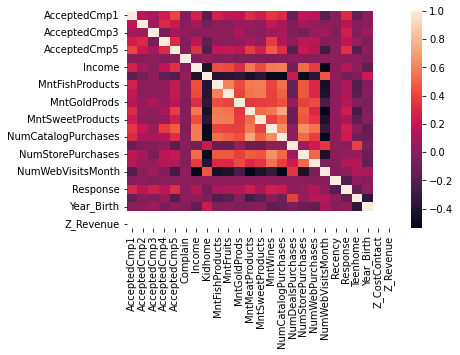

In [12]:
sns.heatmap(cor)

In [13]:
df1 = pd.get_dummies(df1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:

scaler = MinMaxScaler()
scaler.fit(df1.values)

MinMaxScaler()

In [16]:
df_scaled = scaler.transform(df1)

In [17]:
import scipy.cluster.hierarchy as shc

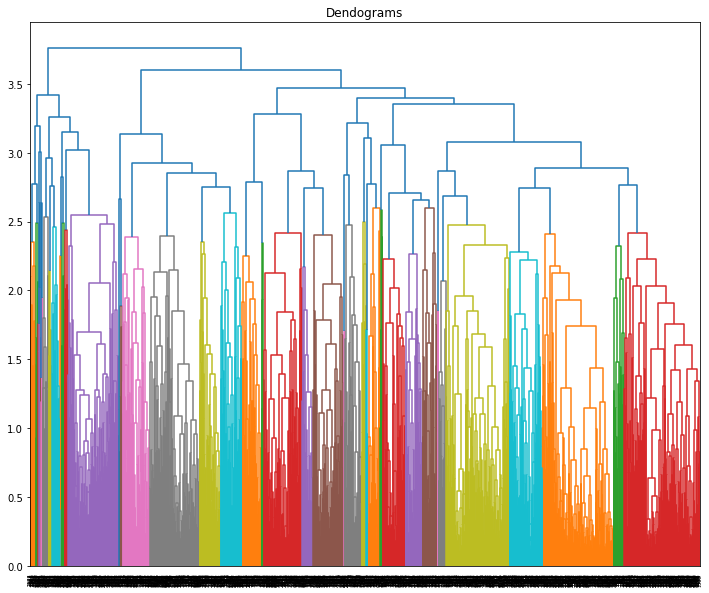

In [18]:
plt.figure(figsize=(12, 10))
plt.title("Dendograms")
z = shc.linkage(df_scaled, method='complete')
dendo = shc.dendrogram(z)

In [19]:
result = shc.fcluster(z, 3.5, criterion = 'distance')
df['result'] = result

In [20]:
df['result'].value_counts()

3    1533
2     409
1     298
Name: result, dtype: int64

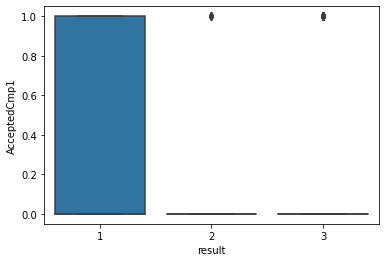

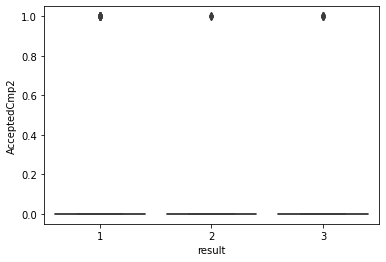

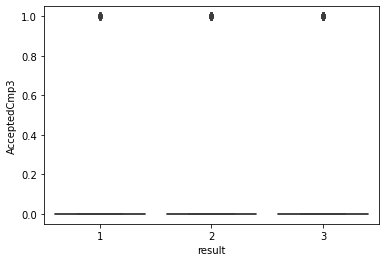

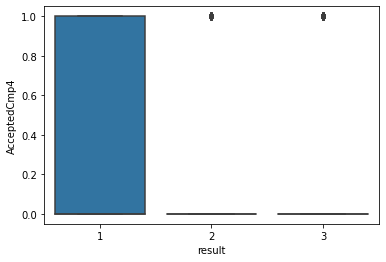

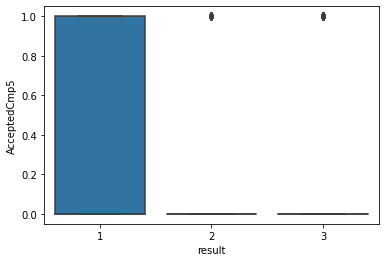

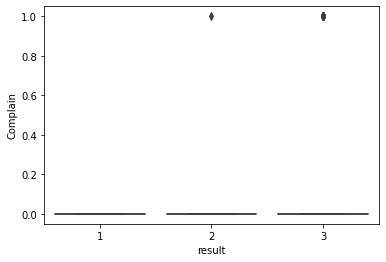

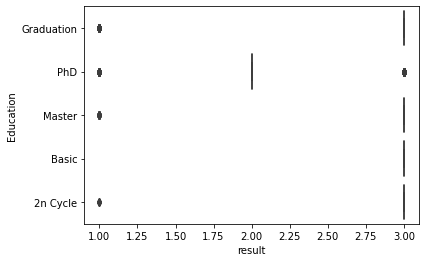

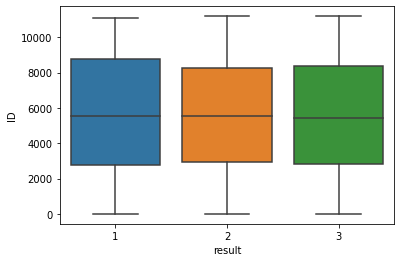

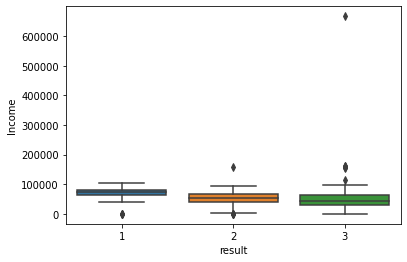

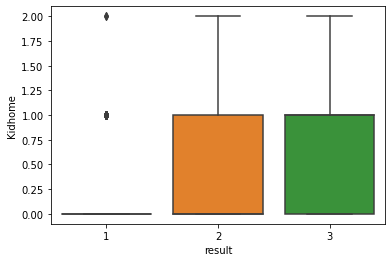

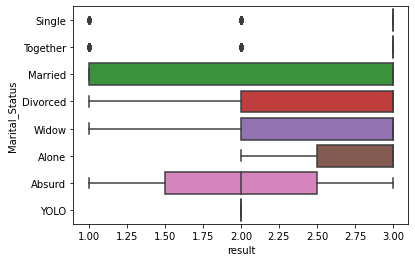

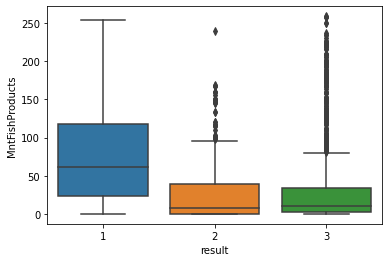

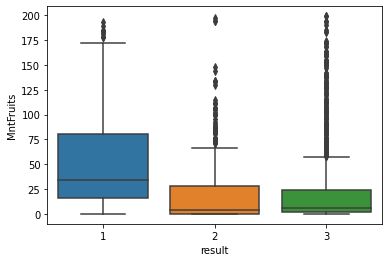

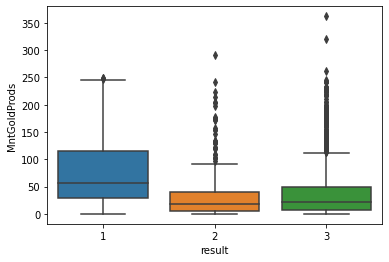

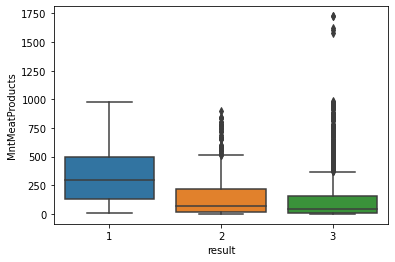

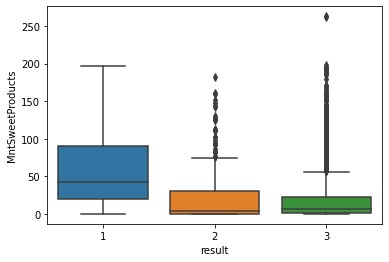

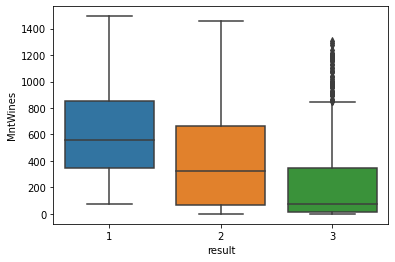

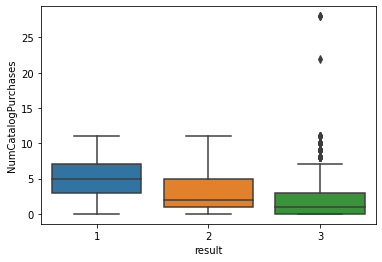

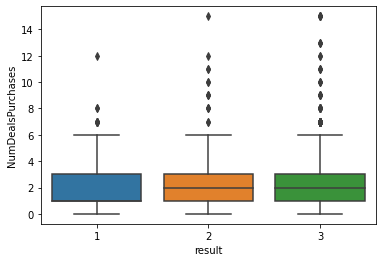

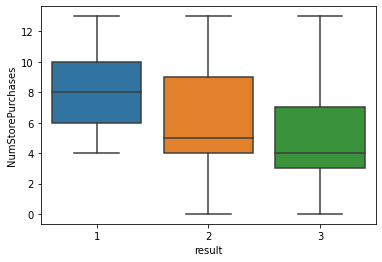

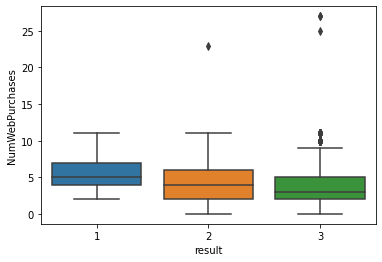

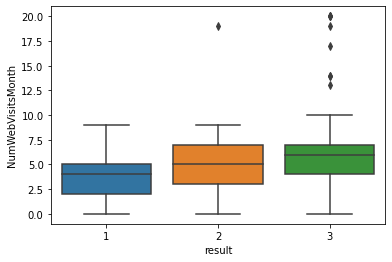

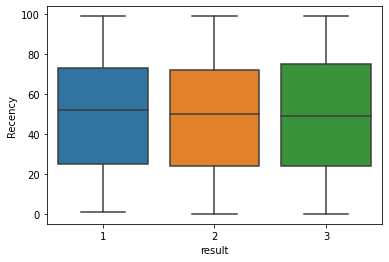

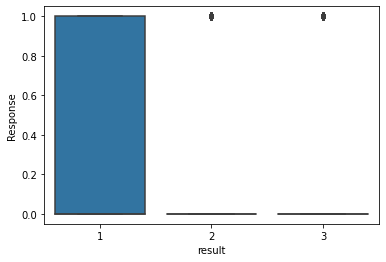

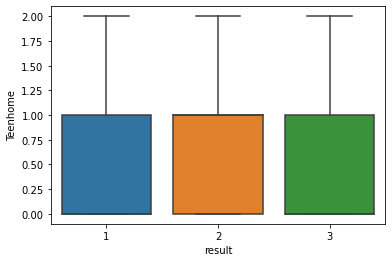

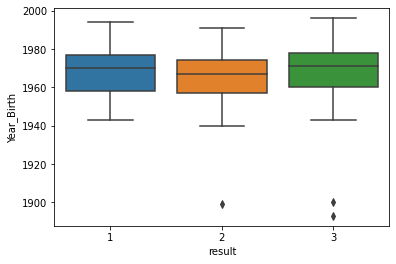

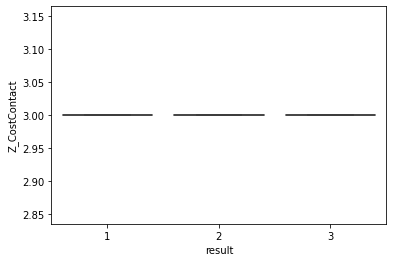

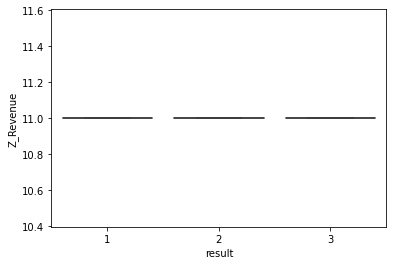

In [21]:
for i in df.columns[:-1]:
    sns.boxplot(x = df['result'], y = df[i])
    plt.show()